In [1]:
# imports
from Helper import Helper
from DatabaseManager import DatabaseManager

In [2]:
# load database
dbManager = DatabaseManager()
helper = Helper(dbManager)

terminating database....
terminating database....
terminating database....
terminating database....


In [3]:
# checking the users table
print(dbManager.runCommand("SELECT * FROM users LIMIT 5;"))
# checking the games table
print(dbManager.runCommand("SELECT * FROM games LIMIT 1;"))
# checking the gameStats table
print(dbManager.runCommand("SELECT * FROM gameStats LIMIT 1;"))

terminating database....
[('onetti2015eto', None, 1510), ('alequine', None, 1633), ('vrishti_grade1', None, 1391), ('spsilvio', None, 1221), ('jackspar', None, 1590)]
terminating database....
[]
terminating database....
[('M1i9n767', 'mate', 'benedictchessman', 2068, 2, 2, 2, 76, 'notsalomon', 2117, 4, 1, 0, 28, 'Sicilian Defense: Hyperaccelerated Dragon', 'B27', 4, ['e4', 'c5', 'Nf3', 'g6', 'c3', 'd5', 'exd5', 'Qxd5', 'Na3', 'Bg7', 'd4', 'cxd4', 'Nb5', 'Na6', 'Nbxd4', 'Nf6', 'Bb5+', 'Bd7', 'Bxd7+', 'Nxd7', 'O-O', 'O-O', 'Bf4', 'Rad8', 'Be3', 'Nac5', 'Qc2', 'Rfe8', 'a3', 'e5', 'Ne2', 'e4', 'Nfd4', 'Nd3', 'Rad1', 'N7e5', 'b3', 'Qd6', 'a4', 'Ng4', 'Nb5', 'Qxh2#'], [33, 32, 0, 64, 41, 46, 16, 38, 16, 25, 18, 0, 13, 24, 27, 17, 16, 12, 7, 3, -6, 0, -56, -42, -20, -32, -46, 25, -60, -2, -131, -74, -102, -71, -78, -64, -300, -118, -268, -247], 1)]


In [6]:
# checking the users table
print(dbManager.runCommand("SELECT COUNT(*) FROM users LIMIT 5;"))
# checking the games table
print(dbManager.runCommand("SELECT COUNT(*) FROM games LIMIT 1;"))
# checking the gameStats table
print(dbManager.runCommand("SELECT COUNT(*) FROM gameStats LIMIT 1;"))

terminating database....
[(39685,)]
terminating database....
[(44652,)]
terminating database....
[(44652,)]


In [5]:
dbManager.populateUsersTable("../Data/Scraped_Files/")
dbManager.populateGamesTable("../Data/Scraped_Files/")
dbManager.populateGameStatsTable("../Data/Scraped_Files/")

Creating creating values to add to users table
Done creating values to add to users table: 12031 element
Creating creating values to add to games table
Done creating values to add to games table: 44652 element
Command has been executed
terminating database....
Creating creating values to add to gameStats table
Done creating values to add to gameStats table
syntax error at or near ";"
LINE 1: ...der,blackACPL,openingName,eco,ply,moves,eval,winner) VALUES;
                                                                      ^



In [7]:
users = dbManager.getDataFrame("SELECT * FROM users;")
games = dbManager.getDataFrame("SELECT * FROM games;")
gameStats = dbManager.getDataFrame("SELECT * FROM gameStats;")

In [ ]:
users.head()

<AxesSubplot: ylabel='Density'>

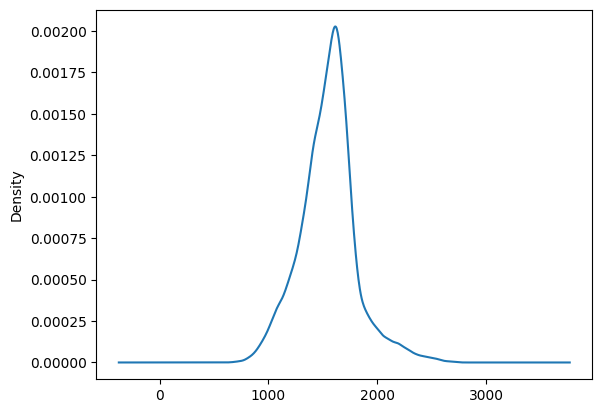

In [8]:
# check users distribution
users['rating'].plot.kde()

In [20]:
# we need more users rated under 1700
users_under_1000 = users[users['rating']<=1000]['userid'].tolist()
len(users_under_1000)

773

In [ ]:
done = []
new_username_set = set()
for user in users_under_1000:
    new_username = helper.scrape_n_rapid_games('../Data/Scraped_Files',user,50, True, True)
    new_username_set.union(new_username)
    done.append(user)

In [ ]:
print(len(done))
for user in done:
    done.remove(user)
    users_under_1700.remove(user)

In [ ]:
import os
import json

path = "../Data/Scraped_Files"
gameId = None
to_be_deleted = []
for user in os.listdir(path):
    for game in os.listdir(f"{path}/{user}"):
        if os.path.getsize(f"{path}/{user}/{game}") == 0:
            os.remove(f"{path}/{user}/{game}")
        with open(f"{path}/{user}/{game}", "r") as f:
            g = json.load(f)
            gameId = g['id']
            for game2 in os.listdir(f"{path}/{user}"):
                if game == game2:
                    continue
                with open(f"{path}/{user}/{game2}", "r") as f2:
                    g2 = json.load(f2)
                    gameId2 = g2['id']
                    if gameId == gameId2:
                        if os.path.isfile(f"{path}/{user}/{game}"):
                            to_be_deleted.append(f"{path}/{user}/{game}")

In [ ]:
for filename in to_be_deleted:
    if filename[-7]==' ':
        print(filename)
        try:
            os.remove(filename)
        except:
            continue